<a href="https://colab.research.google.com/github/Amukozoberit/Electric-car-financial-analysis/blob/main/hypothesisTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Import the dataset
data=pd.read_csv('/content/autolib_daily_events_postal_code.csv')
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

# Detect and Removing outliers

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


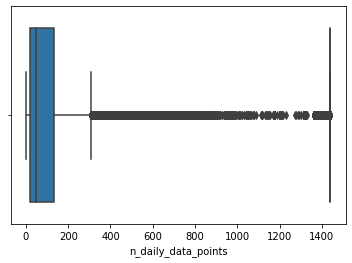

In [9]:

# Box Plot
import seaborn as sns
print(sns.boxplot(data['BlueCars_returned_sum']))
print(sns.boxplot(data['n_daily_data_points']))

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New Shape: ", data.shape)

Old Shape:  (16085, 13)
New Shape:  (9783, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

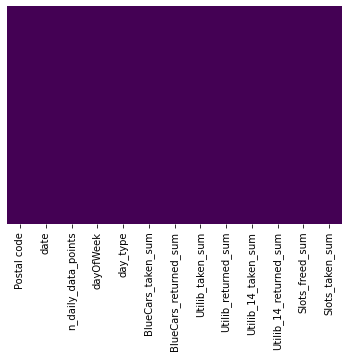

In [11]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
data.isnull().sum()

#there are no null values

In [12]:
data.nunique()
# We have once categorical variable

Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

# Exploratory Analyis

In [13]:
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

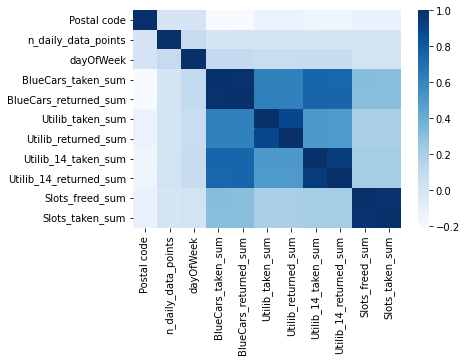

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='Blues',annot=False) 


In [15]:
# Drop unused columns
data=data.drop(['Utilib_returned_sum', 'Utilib_14_taken_sum','Utilib_taken_sum', 'Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum'],axis=1)

# data=data.drop(['Utilib_taken_sum'])
data.columns
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
3899,91330,1/1/2018,1440,0,weekday,19,9
3900,91330,1/2/2018,1438,1,weekday,10,10
3901,91330,1/3/2018,1439,2,weekday,11,13
3903,91330,1/5/2018,1440,4,weekday,10,6
3905,91330,1/7/2018,1440,6,weekend,28,17


In [16]:
data.groupby(data['day_type']).mean()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
day_type,,,,,
weekday,93101.552786,1439.643402,1.872287,45.560557,45.689150
weekend,93112.126223,1439.825177,5.527843,57.718529,57.354708


### Observation

look at the mean of blue cars taken and returned... they are very close ..45.56..45.68 is such a small difference   57.71..57.35 is too close too

# Question are they similar cars taken and cars returned during the weekend
lets take the weekend because it has larger mean

In [17]:


data=data[data['day_type']=='weekend']
dataA=data[data['Postal code']=='75001']
dataB=data[data['Postal code']=='75017']




In [18]:
data.groupby(data['Postal code']).mean().tail(5)

,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,,,,
94700,1439.825000,5.525000,46.625000,45.325000
94800,1439.820513,5.512821,106.615385,106.871795
95100,1439.825000,5.525000,35.550000,33.225000
95870,1439.825000,5.525000,20.075000,20.025000
95880,1439.825000,5.525000,28.700000,26.025000


# univariate analysis

In [19]:
data.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,93112.126223,1439.825177,5.527843,57.718529,57.354708
std,1015.852872,0.493524,0.499308,48.991550,49.600634
min,91330.000000,1438.000000,5.000000,0.000000,0.000000
25%,92270.000000,1440.000000,5.000000,21.000000,20.000000
50%,93110.000000,1440.000000,6.000000,43.000000,42.000000
75%,94100.000000,1440.000000,6.000000,82.000000,82.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000


In [20]:
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of blue cars taken')

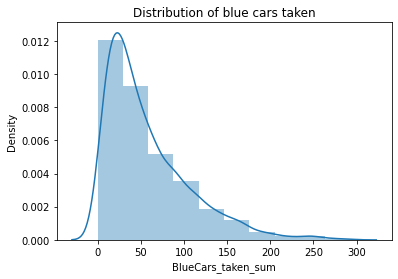

In [21]:
sns.distplot(data['BlueCars_taken_sum'], bins=10)
plt.title('Distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of postal code')

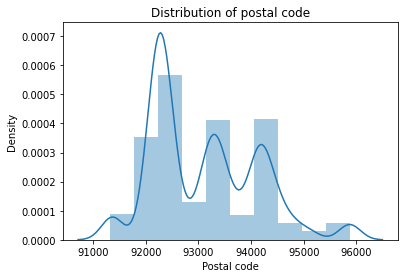

In [22]:
sns.distplot(data['Postal code'], bins=10)
plt.title('Distribution of postal code')

([<matplotlib.patches.Wedge at 0x7f65060dd790>,
 [Text(0.7686463782539237, 0.7868816589533183, '17'),
  Text(-0.6713412594193596, 0.8713787427985767, '13'),
  Text(-1.045362373897304, -0.34237042401439055, '18'),
  Text(-0.10300565532220125, -1.0951665786407307, '29'),
  Text(0.937229790883603, -0.5758474790083551, '7')],
 [Text(0.4192616608657765, 0.42920817761090085, '25.37%'),
  Text(-0.3661861415014689, 0.4752974960719509, '20.15%'),
  Text(-0.5701976584894384, -0.18674750400784937, '19.03%'),
  Text(-0.056184902903018856, -0.5973635883494894, '17.91%'),
  Text(0.5112162495728743, -0.3140986249136482, '17.54%')])

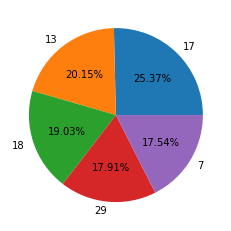

In [23]:

data_values=data['BlueCars_returned_sum'].value_counts()
data_index=data['BlueCars_returned_sum'].value_counts().index

plt.pie(
    data_values[:5],
    labels=data_index[:5],
    autopct='%1.2f%%',
    explode=None,

)

In [24]:
# Bivariate Analyisis

# Bivariate Analysis

Theres linear relationship between blucars taken and returned  them

sns.pairplot(data[['BlueCars_taken_sum','BlueCars_returned_sum']]

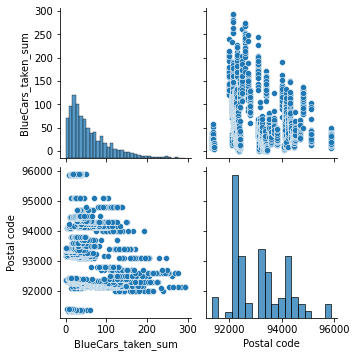

In [26]:
sns.pairplot(data[['BlueCars_taken_sum','Postal code']])

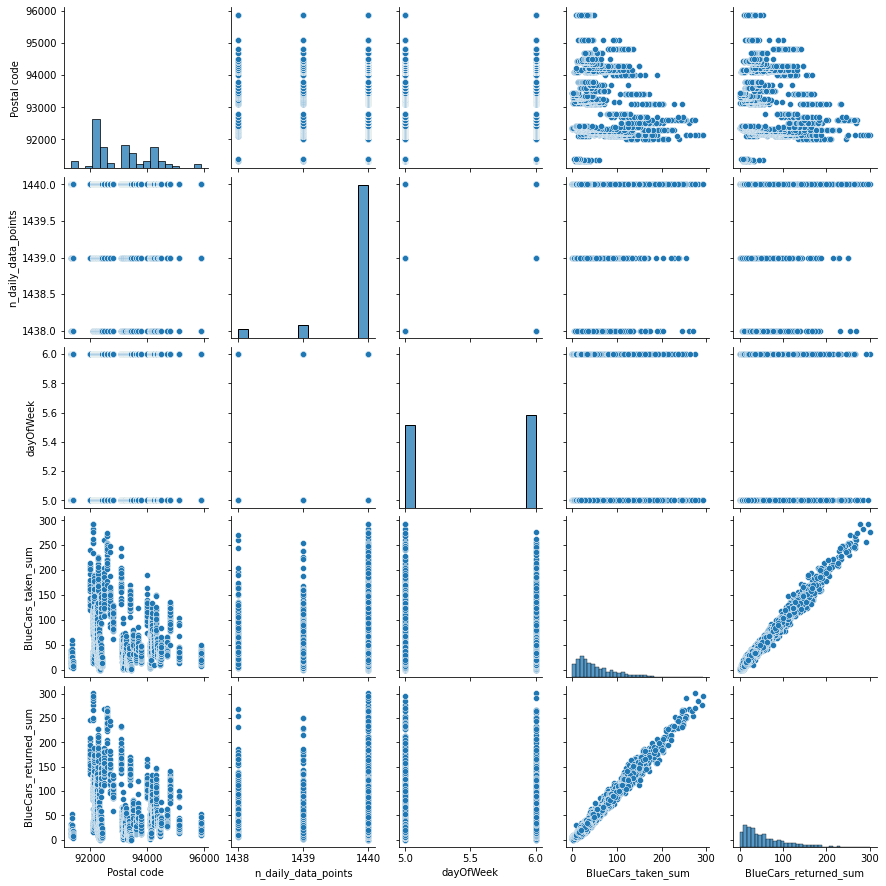

In [27]:
sns.pairplot(data)
plt.show()

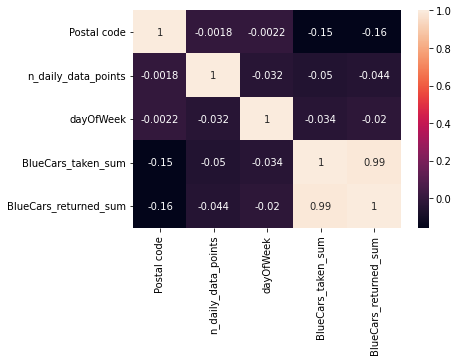

In [28]:
sns.heatmap(data.corr(),annot=True)

blue cars taken and returns correlation of 0.99

# Hypothesis testing



## Null Hypothesis
**There is no diffrence between the blue cars taken in area 92000 and 94700 during the weekend**
 
##  Alternate Hypothesis
**There is a difference between the blue cars taken in area 9200 and 94700 during the weekend**


[Report](https://docs.google.com/document/d/1-C_RGBTcK4uoNXEdb1LyXa2Cwzz5_yQCCtmYH-UT39Y/edit?usp=sharing)









# steps
1. define problem clear research problem

> Define null hypothesis and alternative

> determine applied test and sampling distribution


In [88]:
import scipy.stats as stats
data=data[data['day_type']=='weekend']
dataA=data[data['Postal code'] ==92000]
dataB=data[data['Postal code'] ==94700]
dataA=dataA.loc[:, ['Postal code','dayOfWeek','BlueCars_returned_sum','BlueCars_taken_sum']]
dataB=dataB.loc[:, ['Postal code','dayOfWeek','BlueCars_returned_sum','BlueCars_taken_sum']]

# data.groupby('Postal code').size()
dataB.head()



,Postal code,dayOfWeek,BlueCars_returned_sum,BlueCars_taken_sum
15311,94700,6,37,34
15317,94700,5,51,54
15318,94700,6,56,61
15324,94700,5,50,53
15325,94700,6,44,44


In [126]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")
check_normality(dataA)
check_normality(dataB)


p=stats.shapiro(dataA)
p_value=p[1]


if p_value <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
Reject null hypothesis >> The data is not normally distributed


In [128]:
dataA.agg(["count", "min", "max", "median", "mean", "skew"])

# count=32 
# 32>30 

,Postal code,dayOfWeek,BlueCars_returned_sum,BlueCars_taken_sum
count,32.0,32.000000,32.000000,32.000000
min,92000.0,5.000000,135.000000,120.000000
max,92000.0,6.000000,246.000000,240.000000
median,92000.0,6.000000,175.000000,163.500000
mean,92000.0,5.531250,175.437500,165.593750
skew,0.0,-0.131491,0.770856,0.551099


t-test does not require data to  be normally distributed
We can still use sample test even with 40 samples

In [131]:
stats.mannwhitneyu(x=dataA, y=dataB
                   , alternative = 'two-sided')
res=stats.mannwhitneyu(dataA, dataB, alternative='two-sided')

pvalue=res.pvalue
print(res)



MannwhitneyuResult(statistic=4570.0, pvalue=0.0)


In [132]:
if pvalue <0.05:
        print("Reject null hypothesis ")
else:
        print("Fail to reject null hypothesis")

Reject null hypothesis 


Conclusion

There is a diffrence between the blue cars taken in area 92000 and 94700 during the weekend